In [1]:
import lumispy as lum
import hyperspy.api as hs
hs.preferences.General.plot_backend = "mpl"
import hyperspy.api as hs
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib widget

Numba is not installed, falling back to non-accelerated implementation.
Numba is not installed, falling back to non-accelerated implementation.
Numba is not installed, falling back to non-accelerated implementation.
Numba is not installed, falling back to non-accelerated implementation.
Numba is not installed, falling back to non-accelerated implementation.
Numba is not installed, falling back to non-accelerated implementation.
Numba is not installed, falling back to non-accelerated implementation.


WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:256)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:256)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:256)


In [7]:
cl_near_mark = hs.load(r"C:\Users\cobia\OneDrive - University of Cambridge\CL\session_2024_12_01\HYP-SI-221124-02\HYPCard.sur", signal_type="CL_SEM")
cl_away_mark = hs.load(r"C:\Users\cobia\OneDrive - University of Cambridge\CL\session_2024_12_01\HYP-SI-221124-04-NEWLOC-006\HYPCard.sur", signal_type="CL_SEM")

In [6]:
cl_near_mark.plot()

In [8]:
cl_away_mark.plot()

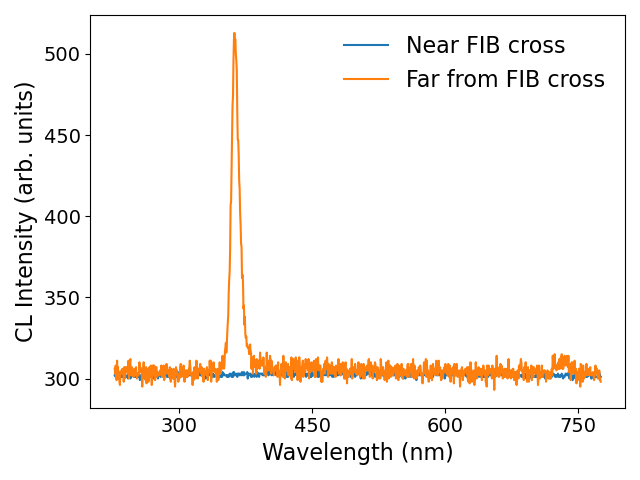

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Extract spectra from the data
spectrum_near = cl_near_mark.inav[1, 1]
spectrum_far = cl_away_mark.inav[1, 1]

# Get signal axis (e.g., wavelength) and data
x = spectrum_near.axes_manager[-1].axis  # Usually the signal axis
y1 = spectrum_near.data
y2 = spectrum_far.data

# Create the figure and axis
fig, ax = plt.subplots()

# Plot both spectra
ax.plot(x, y1, label="Near FIB cross")
ax.plot(x, y2, label="Far from FIB cross")

# Label axes
ax.set_ylabel("CL Intensity (arb. units)", fontsize=16)
ax.set_xlabel("Wavelength (nm)", fontsize=16)

# Format tick sizes
ax.tick_params(axis='both', which='major', labelsize=14)

# Reduce number of ticks for clarity
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))

# Add legend
ax.legend(fontsize=16, frameon=False)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the plot
plt.savefig("fib_comparison.png", dpi=600, transparent=True)


In [1]:
!pip install graphviz

In [2]:
from graphviz import Digraph

def add_subtree(dot, parent, structure):
    """
    Recursively add nodes/edges to a graphviz Digraph
    based on nested dict schema.
    """
    for key, val in structure.items():
        node_id = f"{parent}_{key}"
        dot.node(node_id, key, shape="folder" if isinstance(val, dict) else "note")
        dot.edge(parent, node_id)
        if isinstance(val, dict):
            add_subtree(dot, node_id, val)

def make_schema_diagram(output_file="hdf5_schema"):
    # Define the schema as nested dict
    schema = {
        "CL": {
            "raw": {"image_001 [256x256x1024]": None,
                    "image_002 [256x256x1024]": None},
            "processed": {"image_001_processed [256x256x3]": None},
            "cutouts": {
                "from_image_001": {
                    "raw": {"cutout_00 [15x15x1024]": None,
                            "cutout_01 [15x15x1024]": None},
                    "processed": {"cutout_00 [15x15x3]": None,
                            "cutout_01 [15x15x3]": None}                            
                }
            },
            "metadata": {
                "acquisition_params": {"image_001_params": None},
                "cutout_coords": {"image_001_cutouts [N x 2]": None}
            }
        },
        "AFM": {
            "raw": {"afm_001 [512x512]": None},
            "processed": {"afm_001_filtered [512x512]": None},
            "cutouts": {
                "from_afm_001": {"cutout_00 [15x15]": None}
            },
            "metadata": {
                "acquisition_params": {"afm_001_params": None},
                "cutout_coords": {"afm_001_cutouts [N x 2]": None}
            }
        },
        "alignment": {
            "CL_to_AFM": {
                "alignment_matrix [3x3]": None,
                "residuals [N x 2]": None
            },
            "CSVs": {
                "cl_afm_alignment_points.csv": None,
                "afm_manual_labels.csv": None
            },
            "transformers": {
                "affine_transform.json": None
            }
        }
    }

    # Build graph
    dot = Digraph(comment="HDF5 Schema", format="png")
    dot.attr(rankdir="TB", fontsize="10")

    # Root node
    root = "root"
    dot.node(root, "hyperspectral_dataset.h5", shape="box3d", style="filled", color="lightblue")

    # Add recursively
    add_subtree(dot, root, schema)

    # Render to file
    dot.render(output_file, view=True)
    print(f"Schema diagram saved as {output_file}.png")

if __name__ == "__main__":
    make_schema_diagram()


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH